In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ENRIQUECIMENTO DOS DADOS

## OPERAÇÕES MATEMÁTICAS: UNIVARIADO

### Square-root / Log

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer

# load your data
data = pd.read_csv(r"C:\Users\Rafael Pietro\OneDrive\Cursos\DNC\Datasets\Data Cleaning e Data Wrangling\Operações\StatewiseTestingDetails.csv")
data.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [53]:
data.Negative = data.Negative.map(lambda x: int(x) if not pd.isnull(x) and x!=" " else np.nan)

In [54]:
data.describe()

,TotalSamples,Negative,Positive
count,1.633600e+04,6.968000e+03,5.662000e+03
mean,5.376466e+06,1.868881e+06,5.652654e+04
std,8.780338e+06,3.498175e+06,1.673108e+05
min,5.800000e+01,0.000000e+00,0.000000e+00
25%,1.729098e+05,7.639150e+04,5.362500e+02
50%,9.307580e+05,4.221375e+05,4.771000e+03
75%,7.284795e+06,2.071205e+06,3.361875e+04
max,6.789786e+07,8.356103e+07,1.638961e+06


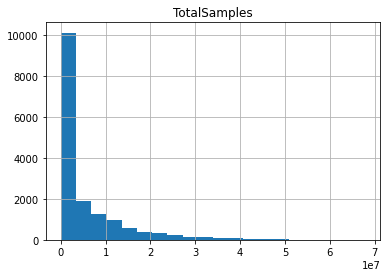

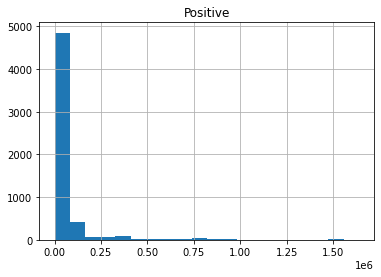

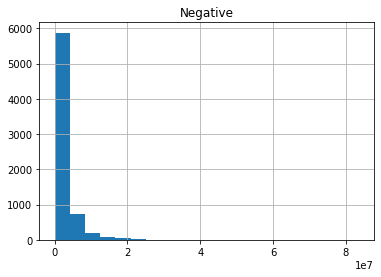

In [55]:
for col in ['TotalSamples','Positive', 'Negative']:
    data[[col]].dropna().hist(bins=20)
    plt.show()

In [56]:
# create columns variables to hold the columns that need transformation
cols = ['TotalSamples']

# create the function transformer object with logarithm transformation
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)

# apply the transformation to your data
for col in cols:
    data['{}_sqrt'.format(col)] = sqrt_transformer.transform(data[cols])

c:\Anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


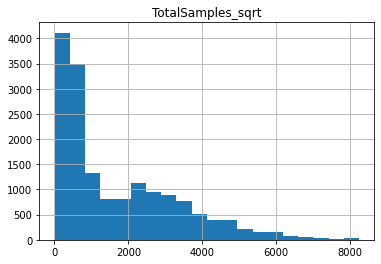

In [57]:
for col in ['TotalSamples_sqrt']:
    data[[col]].hist(bins=20)

In [58]:
# create columns variables to hold the columns that need transformation
cols = ['TotalSamples']

# create the function transformer object with logarithm transformation
logarithm_transformer = FunctionTransformer(np.log, validate=True)

# apply the transformation to your data
for col in cols:
    data['{}_log'.format(col)] = logarithm_transformer.transform(data[cols])

c:\Anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


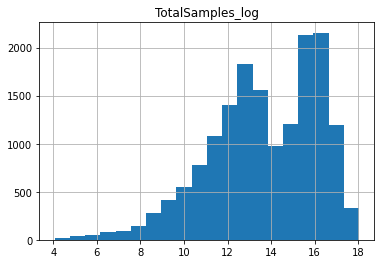

In [59]:
for col in ['TotalSamples_log']:
    data[[col]].hist(bins=20)

### Box-Cox Transformation

In [60]:
# import the needed packages.
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

In [61]:
# create the power transformer object with method 'box-cox'
boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)

# apply the transformation to your data
for col in cols:
    data['{}_box-cox'.format(col)] = boxcox_transformer.fit_transform(data[cols])

In [62]:
boxcox_transformer.lambdas_

array([0.10964081])

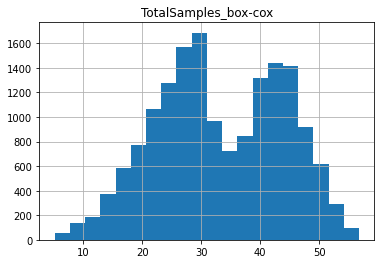

In [63]:
for col in ['TotalSamples_box-cox']:
    data[[col]].hist(bins=20)

### Inverso 

In [64]:
cols = ['TotalSamples']

# create the function transformer object with reciprocal transformation
reciprocal_transformer = FunctionTransformer(np.reciprocal, validate=True)

# apply the transformation to your data
for col in cols:
    data['{}_inverse'.format(col)] = reciprocal_transformer.fit_transform(data[cols])

In [65]:
data['TotalSamples'].describe()

count    1.633600e+04
mean     5.376466e+06
std      8.780338e+06
min      5.800000e+01
25%      1.729098e+05
50%      9.307580e+05
75%      7.284795e+06
max      6.789786e+07
Name: TotalSamples, dtype: float64

In [66]:
data['TotalSamples_inverse'].describe()

count    1.633600e+04
mean     5.930037e-05
std      5.311622e-04
min      1.472801e-08
25%      1.372722e-07
50%      1.074393e-06
75%      5.783365e-06
max      1.724138e-02
Name: TotalSamples_inverse, dtype: float64

## OPERAÇÕES MATEMÁTICAS: BIVARIADO

### Somas e Diferenças

In [67]:
data['dif_positive'] = data.Positive - data.Positive.mean()

In [68]:
data.Positive.describe()

count    5.662000e+03
mean     5.652654e+04
std      1.673108e+05
min      0.000000e+00
25%      5.362500e+02
50%      4.771000e+03
75%      3.361875e+04
max      1.638961e+06
Name: Positive, dtype: float64

In [69]:
data[['dif_positive']].describe()

,dif_positive
count,5.662000e+03
mean,-1.387536e-09
std,1.673108e+05
min,-5.652654e+04
25%,-5.599029e+04
50%,-5.175554e+04
75%,-2.290779e+04
max,1.582434e+06


### Multiplicação / Divisão

In [70]:
data['pc_negative']=data.Negative / data.TotalSamples
data['pc_positive']=data.Positive / data.TotalSamples

array([[<AxesSubplot:title={'center':'pc_positive'}>]], dtype=object)

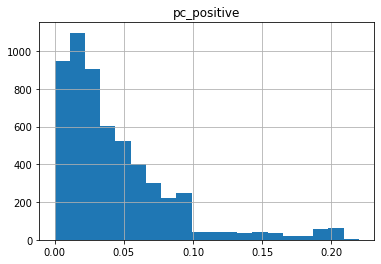

In [71]:
data[['pc_positive']].hist(bins=20)

In [72]:
data['pc_negative'].describe()

count    6968.000000
mean        0.926264
std         0.120189
min         0.000000
25%         0.909006
50%         0.936812
75%         0.961270
max         9.659089
Name: pc_negative, dtype: float64

## DISCRETIZAÇÃO

### Equal-Width

In [73]:
# import the libraries
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

# load your data
data = pd.read_csv(r"C:\Users\Rafael Pietro\OneDrive\Cursos\DNC\Datasets\Data Cleaning e Data Wrangling\Operações\StatewiseTestingDetails.csv")

In [74]:
data

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
16331,2021-08-06,West Bengal,15999961.0,NaN,NaN
16332,2021-08-07,West Bengal,16045662.0,NaN,NaN
16333,2021-08-08,West Bengal,16092192.0,NaN,NaN
16334,2021-08-09,West Bengal,16122345.0,NaN,NaN


In [75]:
# create the discretizer object with strategy uniform and 8 bins
discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='uniform') 

# fit the discretizer to the train set
discretizer.fit(data[["TotalSamples"]].values)

# damos o "fit" para ele salvar o mapeamento que ele fez.

# apply the discretisation
data["TotalSamples_Group"] = discretizer.transform(data[["TotalSamples"]].values)

In [76]:
data["TotalSamples_Group"].value_counts()
# Aqui notamos que ele ficou bem concentrado no 0, talvez não seja a melhor forma de discretização.

0.0    12703
1.0     2124
2.0      857
3.0      323
4.0      195
5.0       67
7.0       35
6.0       32
Name: TotalSamples_Group, dtype: int64

### Equal-frequency

In [77]:
# create the discretizer object with strategy uniform and 8 bins
discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='quantile') 

# fit the discretizer to the train set
discretizer.fit(data[["TotalSamples"]].values)

# apply the discretisation
data["TotalSamples_Group"] = discretizer.transform(data[["TotalSamples"]].values)

In [78]:
data["TotalSamples_Group"].value_counts()
# Aqui, vemos que ficou bem mais uniforme.

7.0    2043
0.0    2042
1.0    2042
2.0    2042
3.0    2042
4.0    2042
5.0    2042
6.0    2041
Name: TotalSamples_Group, dtype: int64

## OPERAÇÕES DE TEXTO

In [79]:
import nltk
nltk.download('punkt')

KeyboardInterrupt: 

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Rafael
[nltk_data]     Pietro\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

sentence = "Eu estou estudando ciência de dados na Dinânima há 2 meses, estou amando!!!"
word_tokens = word_tokenize(sentence)
print(word_tokens)

['Eu', 'estou', 'estudando', 'ciência', 'de', 'dados', 'na', 'Dinânima', 'há', '2', 'meses', ',', 'estou', 'amando', '!', '!', '!']


In [ ]:
from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer('portuguese')
print(snowball_stemmer.stem('estudando'))
print(snowball_stemmer.stem('estudar'))
print(snowball_stemmer.stem('estudei'))

estud
estud
estud


In [ ]:
[snowball_stemmer.stem(x) for x in word_tokens]

['eu',
 'estou',
 'estud',
 'ciênc',
 'de',
 'dad',
 'na',
 'dinânim',
 'há',
 '2',
 'mes',
 ',',
 'estou',
 'amand',
 '!',
 '!',
 '!']

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
new_words= [word for word in word_tokens if word not in string.punctuation]
new_words

['Eu',
 'estou',
 'estudando',
 'ciência',
 'de',
 'dados',
 'na',
 'Dinânima',
 'há',
 '2',
 'meses',
 'estou',
 'amando']

In [ ]:
new_words= [word for word in word_tokens if word not in string.punctuation+"0123456789"]
new_words

['Eu',
 'estou',
 'estudando',
 'ciência',
 'de',
 'dados',
 'na',
 'Dinânima',
 'há',
 'meses',
 'estou',
 'amando']

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
print(stopwords.words('portuguese'))

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [ ]:
new_words = [x.lower() for x in new_words]

In [ ]:
new_words

['eu',
 'estou',
 'estudando',
 'ciência',
 'de',
 'dados',
 'na',
 'dinânima',
 'há',
 'meses',
 'estou',
 'amando']

In [ ]:
clean_tokens = new_words[:] 
for token in clean_tokens:
    if token in stopwords.words('portuguese'):
        clean_tokens.remove(token)

print(clean_tokens)

['estudando', 'ciência', 'dados', 'dinânima', 'meses', 'estou', 'amando']


# PRODUTIZAÇÃO

In [81]:
import pandas as pd
import numpy as np

In [82]:
df = pd.DataFrame([(0.0, np.nan, -1.0, 1.0),
                   (np.nan, 2.0, np.nan, np.nan),
                   (2.0, 3.0, np.nan, 9.0),
                   (np.nan, 4.0, -4.0, 16.0)],
                  columns=list('abcd'))

In [83]:
df

,a,b,c,d
0,0.0,NaN,-1.0,1.0
1,NaN,2.0,NaN,NaN
2,2.0,3.0,NaN,9.0
3,NaN,4.0,-4.0,16.0


In [84]:
df.b = df.b.fillna(0)

In [85]:
df.d = df.d.fillna(df.d.mean())

In [86]:
def treat_na_fill(df, select_columns, fill_values):
  for col in select_columns:
    df[col] = df[col].fillna(fill_values[col])
  return df

In [87]:
df.head()

,a,b,c,d
0,0.0,0.0,-1.0,1.000000
1,NaN,2.0,NaN,8.666667
2,2.0,3.0,NaN,9.000000
3,NaN,4.0,-4.0,16.000000


In [88]:
df = treat_na_fill(df, ['b', 'd'], {'b': 0, 'd': df.d.mean()})

In [89]:
df

,a,b,c,d
0,0.0,0.0,-1.0,1.000000
1,NaN,2.0,NaN,8.666667
2,2.0,3.0,NaN,9.000000
3,NaN,4.0,-4.0,16.000000


In [90]:
def treat_na_drop(df, select_columns):
  for col in select_columns:
    df = df.drop(col, axis=1)
  print(df.head(5))
  return df

In [91]:
df = treat_na_drop(df, ['a', 'c'])

     b          d
0  0.0   1.000000
1  2.0   8.666667
2  3.0   9.000000
3  4.0  16.000000


In [92]:
df.head()

,b,d
0,0.0,1.000000
1,2.0,8.666667
2,3.0,9.000000
3,4.0,16.000000


In [93]:
assert df.dropna().shape[0] == df.shape[0]
# O assert vai checar se tem alguma coluna com nulo, se tiver ele vai acusar erro.

In [94]:
df = pd.DataFrame([(0.0, np.nan, -1.0, 1.0),
                   (np.nan, 2.0, np.nan, np.nan),
                   (2.0, 3.0, np.nan, 9.0),
                   (np.nan, 4.0, -4.0, 16.0)],
                  columns=list('abcd'))
df

,a,b,c,d
0,0.0,NaN,-1.0,1.0
1,NaN,2.0,NaN,NaN
2,2.0,3.0,NaN,9.0
3,NaN,4.0,-4.0,16.0


In [95]:
df.pipe(treat_na_fill, ['b', 'd'], {'b': 0, 'd': df.d.mean()}
        ).pipe(treat_na_drop, ['a', 'c'])

     b          d
0  0.0   1.000000
1  2.0   8.666667
2  3.0   9.000000
3  4.0  16.000000


,b,d
0,0.0,1.000000
1,2.0,8.666667
2,3.0,9.000000
3,4.0,16.000000
